In [1]:
def binary_to_decimal(binary_list):
    decimal_list = []
    for binary_num in binary_list:
        decimal_num = int(binary_num, 2)
        decimal_list.append(decimal_num)
    return decimal_list

def remove_repeated_elements(input_list):
    repeated = []
    for element in input_list:
        if input_list.count(element) > 1 and element not in repeated:
            repeated.append(element)
    return [x for x in input_list if x not in repeated]

def decimal_to_binary(decimal_list):
    binary_list = []
    for decimal in decimal_list:
        binary = bin(decimal)
        binary = binary[2:] # remove the '0b' prefix
        binary_list.append(binary)
    return binary_list


## 17 Qubit Surface Code

Creating a gate to allow us to initialize. With all qubits in |0>, one surface code cycle initializes the logical |0> state.

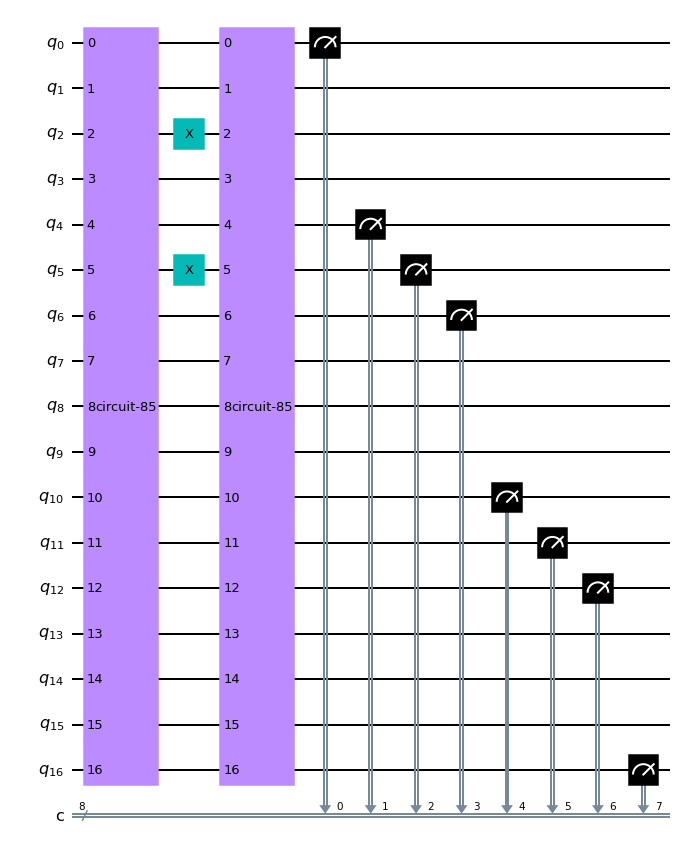

In [2]:
from math import *
from qiskit import *
from qiskit.visualization import plot_histogram
from qiskit.tools.monitor import job_monitor

sc = QuantumCircuit(17)
round1 = [0,2,4,5,6,7,9,10,11,12,14,16]
round2_m = [1,3,8,13,15]
round2_p = [2,7,9,14]
round3_m = [2,7,9,14]
round3_p = [1,3,8,13,15]
final_rot = [0,2,4,5,6,7,9,10,11,12,14,16]
meas_qubits = [0,4,5,6,10,11,12,16]

#Create the first rotations
for i in range(0,17):
    if i in round1:
        sc.ry(-pi/2,i)

#Firstround of  cz gates
sc.cz(1,4)
sc.cz(2,5)
sc.cz(3,6)
sc.cz(8,10)
sc.cz(9,11)
sc.cz(14,16)


#Second rotations
for i in range(0,17):
    if i in round2_m:
        sc.ry(-pi/2,i)
    if i in round2_p:
        sc.ry(pi/2,i)

#Second round of cz gates
sc.cz(1,5)
sc.cz(4,7)
sc.cz(6,9)
sc.cz(8,11)
sc.cz(10,14)
sc.cz(13,16)


#Third round of cz gates
sc.cz(0,3)
sc.cz(2,6)
sc.cz(5,8)
sc.cz(7,10)
sc.cz(9,12)
sc.cz(11,15)


#Third rotations
for i in range(0,17):
    if i in round3_m:
        sc.ry(-pi/2,i)
    if i in round3_p:
        sc.ry(pi/2,i)


#Fourth round of cz gates
sc.cz(0,2)
sc.cz(5,7)
sc.cz(6,8)
sc.cz(10,13)
sc.cz(11,14)
sc.cz(12,15)


#Final rotations
for i in range(0,17):
    if i in final_rot:
        sc.ry(pi/2,i)


my_gate = sc.to_gate() #create gate from surface code

from qiskit_aer.noise import pauli_error
meas_qubits = [0,4,5,6,10,11,12,16]
data_qubits = [1, 2, 3, 7, 8, 9, 13, 14, 15]
new_circ = QuantumCircuit(17,8)
new_circ.append(my_gate,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16])


# # Construct a 1-qubit bit-flip error
# p_error = 0.05
# error = pauli_error([('X', p_error/2),('Z', p_error/2), ('I', 1 - p_error)])
    
    
# # Combine the circuit and the error channel
# for i in range(17):
#     if i not in meas_qubits:
#         new_circ.append(error, [i])

new_circ.x(2)
new_circ.x(5)

new_circ.append(my_gate,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16])
for i in range(0,8):
    new_circ.measure(meas_qubits[i],i)

new_circ.draw('mpl')

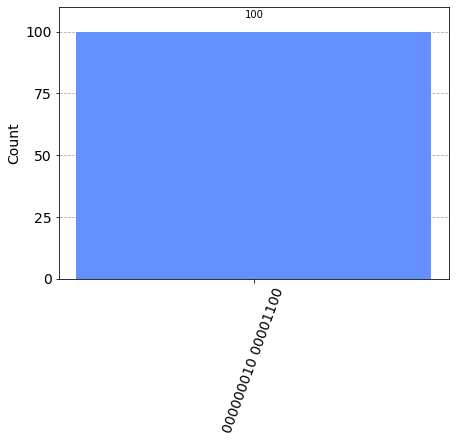

In [3]:
# Create a classical register with 3 bits
cr = ClassicalRegister(9)

# Add the classical register to the quantum circuit
new_circ.add_register(cr)

for i in range(0,9):
    new_circ.measure(data_qubits[i],cr[i])


simulator = Aer.get_backend('qasm_simulator')
# Execute the circuit on the simulator
result = execute(new_circ, simulator, shots = 100).result()

# Get the counts from the result
counts = result.get_counts()

plot_histogram(counts)

In [4]:
from qiskit_aer.noise import pauli_error
meas_qubits = [0,4,5,6,10,11,12,16]
data_qubits = [1, 2, 3, 7, 8, 9, 13, 14, 15]



for i in range(0,9):
    new_circ = QuantumCircuit(17,8)
    new_circ.append(my_gate,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16])
    new_circ.z(data_qubits[i])
    new_circ.x(data_qubits[i])
    new_circ.append(my_gate,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16])
    for j in range(0,8):
        new_circ.measure(meas_qubits[j],j)
    # Create a classical register with 3 bits
    cr = ClassicalRegister(9)

    # Add the classical register to the quantum circuit
    new_circ.add_register(cr)
    
    #Measure data qubits
    for k in range(0,9):
        new_circ.measure(data_qubits[k],cr[k])
    
    simulator = Aer.get_backend('qasm_simulator')
    # Execute the circuit on the simulator
    result = execute(new_circ, simulator, shots = 1).result()

    # Get the counts from the result
    counts = result.get_counts()

    print(f'Phase flip and bit flip on data qubit {i + 1}', counts)

Phase flip and bit flip on data qubit 1 {'000000001 00000110': 1}
Phase flip and bit flip on data qubit 2 {'000000010 00001101': 1}
Phase flip and bit flip on data qubit 3 {'000000100 00001001': 1}
Phase flip and bit flip on data qubit 4 {'000001000 00010110': 1}
Phase flip and bit flip on data qubit 5 {'000010000 00111100': 1}
Phase flip and bit flip on data qubit 6 {'000100000 01101000': 1}
Phase flip and bit flip on data qubit 7 {'001000000 10010000': 1}
Phase flip and bit flip on data qubit 8 {'010000000 10110000': 1}
Phase flip and bit flip on data qubit 9 {'100000000 01100000': 1}


# Noise Model

Logical0 initial state
Runtime: 679.6 seconds


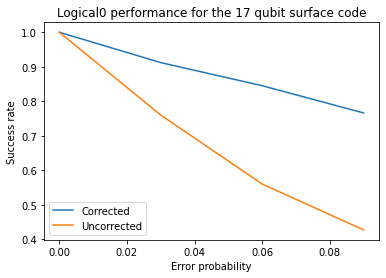

In [5]:
import time
import random
import numpy as np
import matplotlib.pyplot as plt
from qiskit import *
from qiskit_aer.noise import pauli_error
# ------------------------------------------------------------------



# ------------------------------------------------------------------
# Hard-coded constants
random.seed(42)     # For reproducibility
Nshots = 1000

q = QuantumRegister(17)              # Create 18-qubit quantum register
c = ClassicalRegister(8)            # Create 8-bit classical register
cr = ClassicalRegister(9)           # Create 9-bit classical register to measure the data qubits
simulator = Aer.get_backend('qasm_simulator')   # Choose simulator


meas_qubits = [0,4,5,6,10,11,12,16] # Create a list of ancilla qubits
data_qubits = [1, 2, 3, 7, 8, 9, 13, 14, 15] # Create a list of data qubits
x_conditions = [2, 8, 8, 18, 24, 72, 16, 16, 64] # Create a list of conditions of single x errors for c_if statements
z_conditions = [4, 5, 1, 4, 36, 32, 128, 160, 32]  # Create a list of conditions of single z errors for c_if statements
                                                    # NOTE: Single errors still not all unique
single_x_z_conditions = [6, 13, 9, 22, 60, 104, 144,96, 176] # Create a list of conditions for x and z errors on single qubits
    
error_probs = np.arange(0, 0.101, 0.03)
sc_gate = sc.to_gate() #create gate from surface code
# ------------------------------------------------------------------



# ------------------------------------------------------------------
# Subroutine to loop over pauli_error probabilities
# Argument 'init' for |0>
def scan_probs(init):
    success_rates = []
    uncorr_rates = []
    for p_err in error_probs:
        sc = QuantumCircuit(q, c)  # Create quantum circuit
        
        #Initialize logical 0 
        sc.append(sc_gate, [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]) 

        # Construct a 1-qubit bit-flip error
        error = pauli_error([('X', 0.5 * p_err),
                             ('Z', 0.5 * p_err),
                             ('I', 1.0 - p_err)])

        # Combine the circuit and the error channel
        for n in range(17):
            if n in data_qubits:
                sc.append(error, [n])
    
        #Append our 17 qubit surface code entangling gate
        sc.append(sc_gate, [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16])
        
        
        # Measure the eight ancilla qubits
        for j in range(0,8):
            sc.measure(meas_qubits[j],j)
        
        #Correct for single phase flip and bit flip errors
        for i in range(len(data_qubits)):
            sc.x(data_qubits[i]).c_if(c, x_conditions[i])
            sc.z(data_qubits[i]).c_if(c, z_conditions[i])
            sc.x(data_qubits[i]).c_if(c, single_x_z_conditions[i])
            sc.z(data_qubits[i]).c_if(c, single_x_z_conditions[i])
        # Add the classical register to the quantum circuit
        
        sc.add_register(cr)
        # Check the state of the data qubits
        for k in range(0,9):
            sc.measure(data_qubits[k],cr[k])

        # Reproducibly execute the circuit on the simulator
        seed = random.randrange(0, int(1e6))
        result = execute(sc, simulator, shots=Nshots,
                         seed_simulator=seed).result()

        # Get the counts from the result
        counts = result.get_counts()
        
        
        num_success = 0
        raw_success = 0
        counts_dict = dict(counts)
        for key, value in counts_dict.items():
            if key[:9] == '000000000':
                num_success += value
                if key == '000000000 00000000':     # Correct without correction
                    raw_success += value
        success_rates.append(num_success / float(Nshots))
        uncorr_rates.append(raw_success / float(Nshots))
        #print("%.3g %.3g %.3g" % (p_err, success_rates[-1], uncorr_rates[-1]))

    return success_rates, uncorr_rates
# ------------------------------------------------------------------



# ------------------------------------------------------------------
# Main code
# Loop over |0> and |+> initial states- without |+> currently
for state in ['zero']:
    runtime = -time.time()
    if state == 'zero':
        print("Logical0 initial state")
    else:
        # Blank line in output to separate results
        print("\nLogical+ initial state")

    success_rates, uncorr_rates = scan_probs(state)

    # Print runtime here to ignore time spent looking at plot
    runtime += time.time()
    print("Runtime: %0.1f seconds" % runtime)

    if state == 'zero':
      title = 'Logical0 performance for the 17 qubit surface code'
    else:
      title = 'Logical+ performance for the 17 qubit surface code'

    # Plot the success rate as a function of the error probability
    # TODO: ADD UNCORRECTED VS CORRECTED...
    plt.plot(error_probs, success_rates, label='Corrected')
    plt.plot(error_probs, uncorr_rates, label='Uncorrected')
    plt.title(title)
    plt.xlabel('Error probability')
    plt.ylabel('Success rate')
    plt.legend(loc='lower left')
    plt.show()

The code uses the Qiskit library to simulate the error correction of a 17-qubit quantum computer using the surface code. The noise model used is the Pauli error noise model. It does this by applying a series of errors to the system and measuring the success rate of error correction. The code loops over different error probabilities, applying each one to the system, running the simulation, and measuring the success rate. The code then plots the success rate as a function of the error probability and computes the runtime of the simulation. Currently with runtime issues.

The code below introduces a lookup table for single qubit error syndromes.

In [10]:
lookup_table = {}
x_conditions = [2, 8, 8, 18, 24, 72, 16, 16, 64] # Create a list of conditions of single x errors for c_if statements
z_conditions = [4, 5, 1, 4, 36, 32, 128, 160, 32]  # Create a list of conditions of single z errors for c_if statements
single_x_z_conditions = [6, 13, 9, 22, 60, 104, 144,96, 176] # Create a list of conditions for x and z errors on single qubits
 
                                                                                    
    
for i, (x, z, x_z) in enumerate(zip(x_conditions, z_conditions, single_x_z_conditions)):
    lookup_table[(i, 'x')] = x
    lookup_table[(i, 'z')] = z
    lookup_table[(i, 'x_z')] = x_z
    
    
# for i in range(len(data_qubits)):
#     sc.x(data_qubits[i]).c_if(c, lookup_table[(i, 'x')])
#     sc.z(data_qubits[i]).c_if(c, lookup_table[(i, 'z')])
#     sc.x(data_qubits[i]).c_if(c, lookup_table[(i, 'x_z')])
#     sc.z(data_qubits[i]).c_if(c, lookup_table[(i, 'x_z')])

print(lookup_table[(7,'x')])

16


The cell below illustrates all the error syndromes for all x errors on seperate qubits, which are then used to create the binary lists below.

In [ ]:
for i in range(8):
    for j in range(i + 1, 9):
        new_circ = QuantumCircuit(17, 8)
        new_circ.append(my_gate, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16])
        new_circ.z(data_qubits[i])
        new_circ.x(data_qubits[j])
        new_circ.append(my_gate, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16])
        for k in range(8):
            new_circ.measure(meas_qubits[k], k)
        # Create a classical register with 9 bits
        cr = ClassicalRegister(9)

        # Add the classical register to the quantum circuit
        new_circ.add_register(cr)

        # Measure data qubits
        for l in range(9):
            new_circ.measure(data_qubits[l], cr[l])

        simulator = Aer.get_backend('qasm_simulator')
        # Execute the circuit on the simulator
        result = execute(new_circ, simulator, shots=1).result()

        # Get the counts from the result
        counts = result.get_counts()

        print(f'Phase flip on data qubit {i + 1} and bit flip on {j+1}', counts)


The cell below uses the binary_to_decimal and remove_repeated_elements functions to get a list of unique error syndromes for two x errors, two z erros and a z and x error in decimal notation.

In [12]:
x_x_bin_list = ['00001010',    '00001010',    '00010000',    '00011010',    '01001010',    '00010010',    '00010010',    
                '01000010',    '00000000',    '00011010',    '00010000',    '01000000',    '00011000',    '00011000', 
                '01001000',    '00011010',    '00010000',    '01000000',    '00011000',    '00011000',    '01001000',   
                '00001010',    '01011010',    '00000010',    '00000010',    '01010010',    '01010000',    '00001000',  
                '00001000',    '01011000',    '01011000',    '01011000',    '00001000',    '00000000',    '01010000',  
                '01010000']
z_z_bin_list = ['00000001', '00000101', '00000000', '00100000', '00100100', '10000100', '10100100', 
                '00100100', '00000100', '00000001', '00100001', '00100101', '10000101', '10100101', '00100101', 
                '00000101', '00100101', '00100001', '10000001', '10100001', '00100001', '00100000', '00100100', 
                '10000100', '10100100', '00100100', '00000100', '10100100', '10000100', '00000100', '10100000', 
                '10000000', '00000000', '00100000', '10100000', '10000000']

x_z_bin_list = [ "00001100",   "00001100",    "00010110",    "00011100",    "01001100",    "00010100",    "00010100",    
                "01000100",    "00001101",    "00010111",    "00011101",    "01001101",    "00010101",    "00010101",  
                "01000101",    "00010011",    "00011001",    "01001001",    "00010001",    "00010001",    "01000001", 
                "00011100",    "01001100",    "00010100",    "00010100",    "01000100",    "01101100",    "00110100", 
                "00110100",    "01100100",    "00110000",    "00110000",    "01100000",    "10010000",    "11000000", 
                "11100000",'00000111',  '00000011',  '00000110',  '00100110',  '00100010',  '10000010',  '10100010',  
                '00100010', '00001001',  '00001100',  '00101100',  '00101000',  '10001000',  '10101000',  '00101000', 
                '00001100', '00101100',  '00101000',  '10001000',  '10101000',  '00101000',  '00110110',  '00110010',  
                '10010010', '10110010',  '00110010',  '00111000',  '10011000',  '10111000',  '00111000',  '11001000',  
                '11101000',  '01101000',  '10110000',  '00110000',  '00110000', '00000110', '00001101', '00001001', 
                '00010110', '00111100', '01101000', '10010000', '01100000', '10110000']






x_x_conditions = remove_repeated_elements(binary_to_decimal(x_x_bin_list))

z_z_conditions = remove_repeated_elements(binary_to_decimal(z_z_bin_list))

x_z_conditions = remove_repeated_elements(binary_to_decimal(x_z_bin_list))

print(x_z_conditions)


[23, 29, 77, 69, 19, 25, 73, 65, 108, 100, 192, 224, 7, 3, 38, 130, 162, 54, 146, 178, 152, 184, 200, 232, 60]


The code below combines each error syndrome into a new list, all_err.

In [13]:
dub_x = [74, 66, 90, 82]
dub_z = [133, 165, 129, 161]
x_and_z = [23, 29, 77, 69, 19, 25, 73, 65, 108, 100, 192, 224, 7, 3, 38, 130, 162, 54, 
           146, 178, 152, 184, 200, 232, 176, 60]
x_conditions = [2, 8, 8, 18, 24, 72, 16, 16, 64] # Create a list of conditions of single x errors for c_if statements
z_conditions = [4, 5, 1, 4, 36, 32, 128, 160, 32]  # Create a list of conditions of single z errors for c_if statements


import itertools
ab = itertools.chain(dub_x, dub_z, x_and_z, x_conditions, z_conditions)
all_err = list(ab)